Корректно отображается тетрадка [тут](https://nbviewer.jupyter.org/github/paantya/gaialib/blob/master/d2018.ipynb).

# Задание #

# %load http://school.podvorye.ru/astro/Ptashin/HIP-TGAS.txt
Сравнение тригонометрических параллаксов звезд TGAS и Hipparcos

1. Дополнение TGAS данными из Hipparocs (параллаксами)

   Каталог получится из 100 000 звезд.

2. Таблицу "рекордсменов" по разностям параллаксом. Первые 50 звезд с самыми большими отличиями.
   Табличку.
   
3. ... на потом
   Построение полных разностей параллаксов по небесной сфере и (возможно) анализ их с помощью сферических функций.
   
   
13-01-2018

Пишем текст дип. работы

1. Описание TGAS (1-2 стр.)
2. Объединение данных XHIP и TGAS, какие данные берем (столбцы)
3. Гистрограмма разностей (без модуля) - будет видно, что параллаксы Hipparcos больше
4. Распределение разностей по неб. сфере (без модуля)
5. Распределение разностей по неб. сфере (модуля) - необязательно
6. Таблица рекордсменов и распределение их по неб. сфере.


- текст по пп. 1-6 прислать

7. Определить МНК первые 36 (от j=0 до j=35) коэффицентов разложения самих разностей по сферическим функциям.

Питон - МНК (https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.lstsq.html)

In [1]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import sys
import os

from urllib.request import urlretrieve,urlopen
from datetime import datetime

# Enable inline plotting
%matplotlib inline

print('Python version ' + sys.version)
print('Numpy version ' + np.__version__)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.6.3 |Anaconda custom (64-bit)| (default, Oct 13 2017, 12:02:49) 
[GCC 7.2.0]
Numpy version 1.13.3
Pandas version 0.20.3
Matplotlib version 2.1.0


In [2]:
def times():
    #time_format = "[%Y.%m.%d-%H:%M:%S.%f]"
    time_format = "[%H:%M:%S.%f]"
    return str(datetime.strftime(datetime.now(), time_format))

In [3]:
%%time

local_tgas = './../../../data/astro/tgas/'
file_tgas = 'TgasSource_000-000-000.csv'
#print('{}: Loading file {}..'.format(times(), file_tgas), end='')
df_tgas = pd.read_csv(local_tgas + file_tgas)
len_file = len(df_tgas)
#print(' len_file = {}'.format(len_file))


for i in np.arange(1,16):
#for i in np.arange(1,2):
    n = '0'*(3 - len(str(i)))+str(i)
    file_tgas = 'TgasSource_000-000-'+n+'.csv'
    #print('{}: Loading file {}..'.format(times(), file_tgas), end='')
    df0_tgas = pd.read_csv(local_tgas + file_tgas)
    len_df0 = len(df0_tgas)
    df_tgas = df_tgas.append(df0_tgas)
    len_df = len(df_tgas)
    df0_tgas._clear_item_cache()
    #print(' len_file = {}, len_df = {}'.format(len_df0, len_df))
print('{}: [/] End'.format(times()))

[12:24:03.178299]: [/] End
CPU times: user 49 s, sys: 3.37 s, total: 52.3 s
Wall time: 1min 1s


In [4]:
%%time

local_hip = './../../../data/astro/hip/'
file_hip = 'hip2.dat'
name_col = ['hip', #Hipparcos identifier
            'isol_n', #Sol. type new reduction
            'isol_o', #Sol. type old reduction
            'ncomp', #Number of components
            'α', #Right Ascension in ICRS
            'δ', #Declination in ICRS
            'parallax_hip', #Parallax
            'μ_α', #Proper motion in Right Ascension
            'μ_δ', #Proper motion in Declination
            'σ_α', #Formal error on α
            'σ_δ', #Formal error on δ
            'parallax_error_hip', #Formal error on parallax
            'σ_μ_α', #Formal error on μ α
            'σ_μ_δ', #Formal error on μ δ
            'nobs', #Number of field transits used
            'gof', #Goodness of fit
            'prej', #Percentage rejected data
            'var', #Cosmic dispersion added
            'ic', #Entry in one of the suppl.catalogues
            'Hp', #Hp magnitude
            'e_Hp', #Error on mean Hp
            'σ_Hp', #Scatter of Hp
            'VarAnn', #Reference to variability annex
            'V_B', #Colour index
            'σ_V_B', #Formal error on colour index
            'V_I', #Colour index
            'U_1', #Upper-triangular weight matrix
            'U_2', #Upper-triangular weight matrix
            'U_3', #Upper-triangular weight matrix
            'U_4', #Upper-triangular weight matrix
            'U_5', #Upper-triangular weight matrix
            'U_6', #Upper-triangular weight matrix
            'U_7', #Upper-triangular weight matrix
            'U_8', #Upper-triangular weight matrix
            'U_9', #Upper-triangular weight matrix
            'U_10', #Upper-triangular weight matrix
            'U_11', #Upper-triangular weight matrix
            'U_12', #Upper-triangular weight matrix
            'U_13', #Upper-triangular weight matrix
            'U_14', #Upper-triangular weight matrix
            'U_15'  #Upper-triangular weight matrix
           ]
print('{}: [/] Loading file {}..'.format(times(), file_hip), end='')
df_hip = pd.read_csv(local_hip + file_hip,
                     sep="\s+", 
#                     skiprows=1,
#                     usecols=[0,7],
                     names=name_col
                    )
len_file = len(df_hip)
print(' len_file = {}'.format(len_file))

[12:24:03.233165]: [/] Loading file hip2.dat.. len_file = 117955
CPU times: user 1.04 s, sys: 16 ms, total: 1.06 s
Wall time: 1.3 s


In [5]:
df_tgas_hip = df_tgas[~df_tgas['hip'].apply(lambda x: np.isnan(x))];#[['hip','parallax','parallax_error']]
df_tgas_hip['hip'] = df_tgas_hip['hip'].apply(lambda x: int(x));
df_tgas_hip.sort_values(by='hip',inplace=True);
df_hip_tgas = df_hip[df_hip.hip.isin(df_tgas_hip['hip'])][['hip','parallax_hip','parallax_error_hip']];
df_tgas_hip.index = df_hip_tgas.index;

df_tgas_hip['parallax_hip'] = df_hip_tgas['parallax_hip'];
df_tgas_hip['parallax_error_hip'] = df_hip_tgas['parallax_error_hip'];
#df_tgas_hip['parallax_relatively_difference'] = np.abs(df_tgas_hip['parallax'] - df_tgas_hip['parallax_hip'])

#df_tgas_hip.head(10)

/home/p_a/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/p_a/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/p_a/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

In [6]:
srez = (df_tgas_hip['parallax'] > 0) & (df_tgas_hip['parallax_hip'] > 0)

df_tgas_hip['parallax_difference'] = np.abs( 
    df_tgas_hip[srez]['parallax'] - 
    df_tgas_hip[srez]['parallax_hip'])

df_tgas_hip[['hip','parallax','parallax_hip','parallax_difference']].sort_values(
    by='parallax_difference', ascending=False).head(50)

/home/p_a/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,hip,parallax,parallax_hip,parallax_difference
20946,21000,3.613519,93.67,90.056481
42393,42525,5.939341,68.54,62.600659
116689,117081,7.767833,63.56,55.792167
91751,92059,1.025301,55.49,54.464699
16539,16582,3.352539,46.79,43.437461
49814,49971,10.032883,53.21,43.177117
14066,14101,148.510255,106.16,42.350255
90068,90368,9.239326,51.00,41.760674
87493,87784,0.901640,41.30,40.398360
11139,11167,1.600522,40.32,38.719478


In [7]:
%%time


df_tgas_hip.loc[df_tgas_hip['ra'] > 180,'ra'] = df_tgas_hip.loc[df_tgas_hip['ra'] > 180].ra - 360
df_tgas_hip.loc[df_tgas_hip['l'] > 180,'l'] = df_tgas_hip.loc[df_tgas_hip['l'] > 180].l - 360
df_tgas_hip.loc[df_tgas_hip['ecl_lon'] > 180,'ecl_lon'] = df_tgas_hip.loc[df_tgas_hip['ecl_lon'] > 180].ecl_lon - 360

#df_tgas_hip.hist('dec', color = 'k', bins=100)
#df_tgas_hip.hist('b', color = 'k',bins=100)
#df_tgas_hip.hist('ecl_lat', color = 'k',bins=100)

CPU times: user 180 ms, sys: 12 ms, total: 192 ms
Wall time: 230 ms


/home/p_a/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


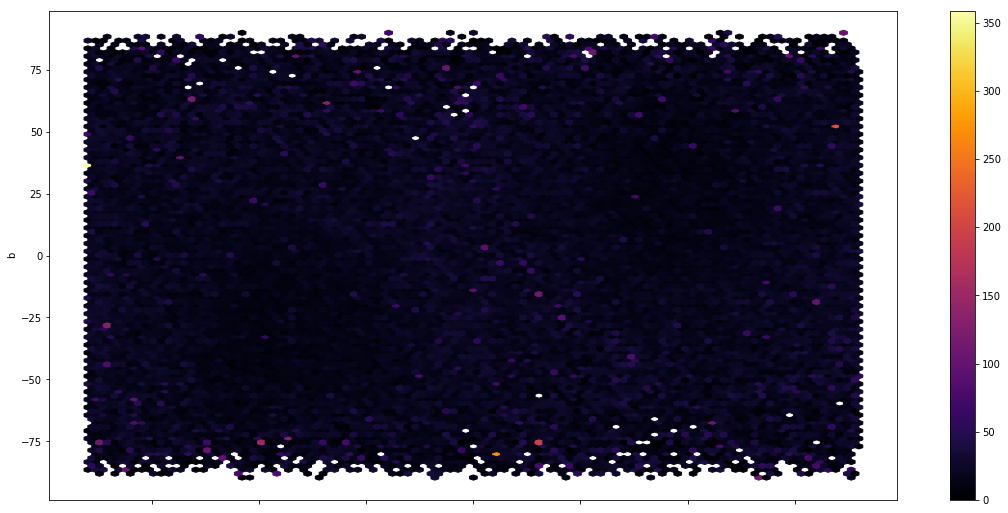

In [8]:
df_tgas_hip.plot.hexbin(x='l',y='b',C='parallax_difference',
                        #color = 'k',
                        #nipy_spectral,gist_ncar,jet,cubehelix,gist_stern,flag
                        cmap='inferno',
                        bins = 360, 
                        #projection = 'hammer',
                        figsize=(19,9))

[12:27:10.270968]: Begin plot_hex_hammer paralax ra, dec, 70.
[12:27:10.571081]: End plot_hammer paralax.


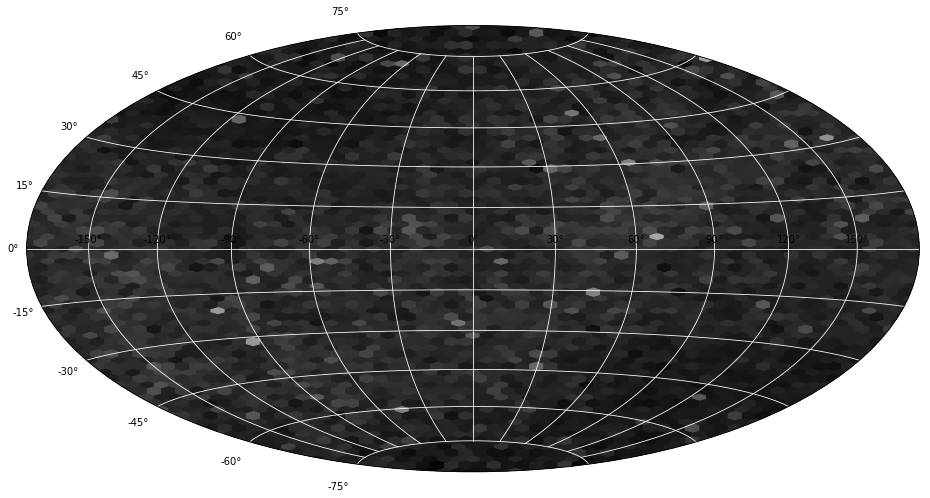

[12:27:12.903554]: Begin plot_hex_hammer paralax l, b, 70.
[12:27:13.186355]: End plot_hammer paralax.


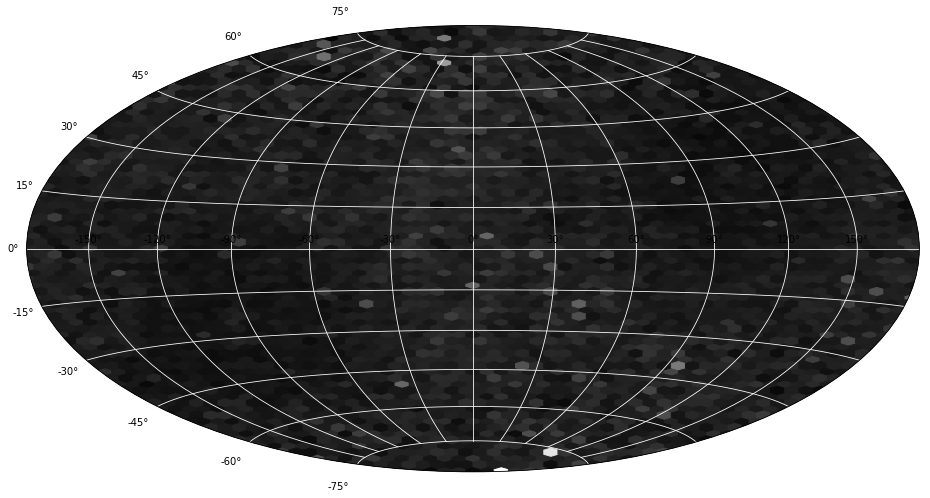

[12:27:15.273520]: Begin plot_hex_hammer paralax ecl_lon, ecl_lat, 70.
[12:27:15.544444]: End plot_hammer paralax.


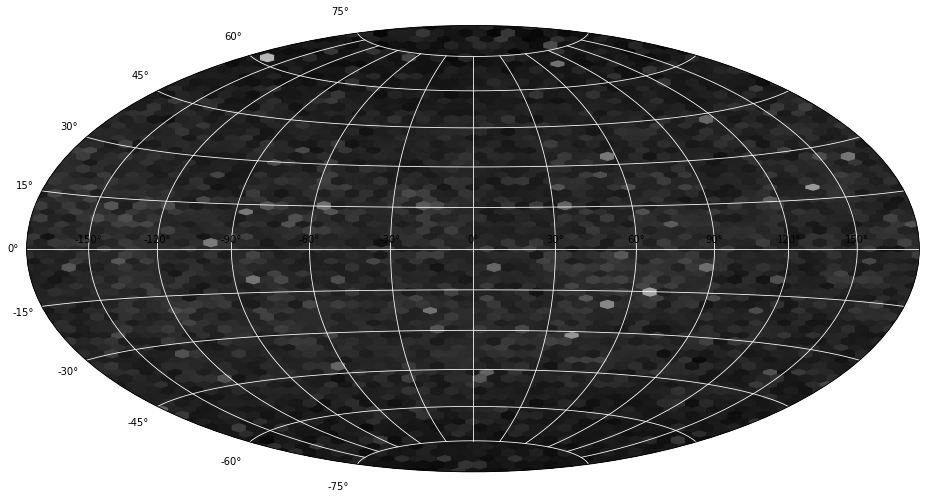

CPU times: user 7.4 s, sys: 48 ms, total: 7.44 s
Wall time: 7.43 s


In [9]:
%%time

def hexbinmy(df0,x,y,c,gridsize=50):
    import matplotlib as mpl
    plt.figure(figsize=(16,9))
    ax = plt.subplot(111, projection = 'hammer')
    ax.set_facecolor('k')
    print('{}: Begin plot_hex_hammer paralax {}, {}, {}.'.format(times(),x,y,gridsize))
    h = ax.hexbin(
        df0[x]*np.pi/180,
        df0[y]*np.pi/180,
        C = df0[c],
        gridsize=gridsize,
        cmap='gray',#'bwr',#'seismic', #'inferno',
        mincnt=0,
        #bins='log',
        #marginals = True,
        #vmax=10,
        #s = 1.05,
        #marker='o',
        #color = 'r',
        #linewidths=0.01,
        #label = '20-40 ra'
    )
    
    '''
    bounds = [i for i in np.arange(max(h.get_array()))]
    cmap = mpl.cm.cool
    norm = mpl.colors.BoundaryNorm(bounds[::len(bounds)], cmap.N)
    cb = plt.colorbar(h,
                      cmap=cmap,               
                      norm=norm,
                      boundaries=bounds,
                      extend='both',
                      # Make the length of each extension
                      # the same as the length of the
                      # interior colors:
                      extendfrac='auto',
                      ticks=bounds,
                      spacing='uniform',
                      orientation='horizontal',
                      #extendfrac='auto',
                      #spacing='proportional',
                      #extend='both',
                      #orientation='horizontal'
                     )
    #cb.set_label('counts')
    #plt.legend(loc='best');
    '''
    #plt.grid()#color='k')#, linestyle='--', linewidth=1.9)
    params = matplotlib.figure.SubplotParams(left=.02, right=.98, top=.99, bottom=.01)
    
    #plt.tight_layout()
    #plt.savefig('hexbin_'+x+'-'+y+'_'+str(gridsize)+'.png',dpi=1000,format='png')
    print('{}: End plot_hammer paralax.'.format(times()))
    plt.grid(color='w')#, linestyle='--', linewidth=1.9)
    
    plt.show()


hexbinmy(df_tgas_hip,'ra','dec','parallax_difference',70)    
hexbinmy(df_tgas_hip,'l','b','parallax_difference',70)
hexbinmy(df_tgas_hip,'ecl_lon', 'ecl_lat','parallax_difference',70)

In [10]:
tmp = df_tgas_hip[['l','b','parallax_difference']].sort_values(by='parallax_difference', ascending=False).head(50)


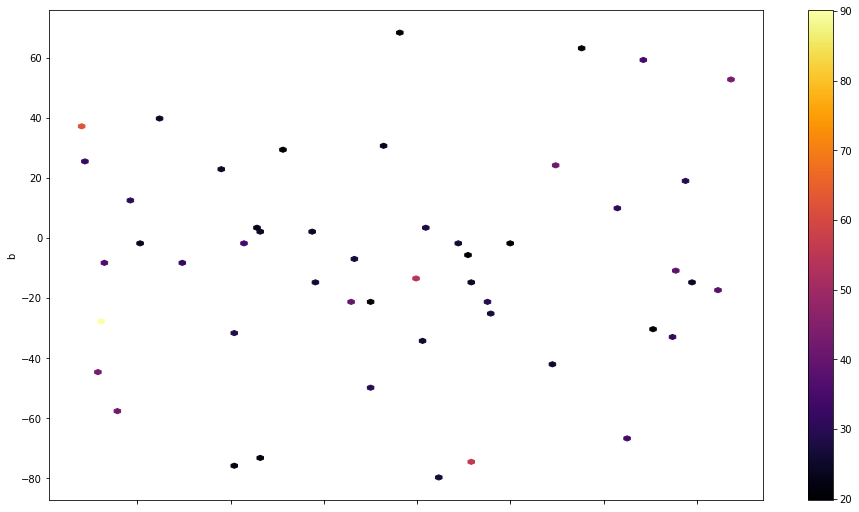

In [11]:
tmp.plot.hexbin('l','b','parallax_difference',cmap='inferno',figsize=(16, 9))

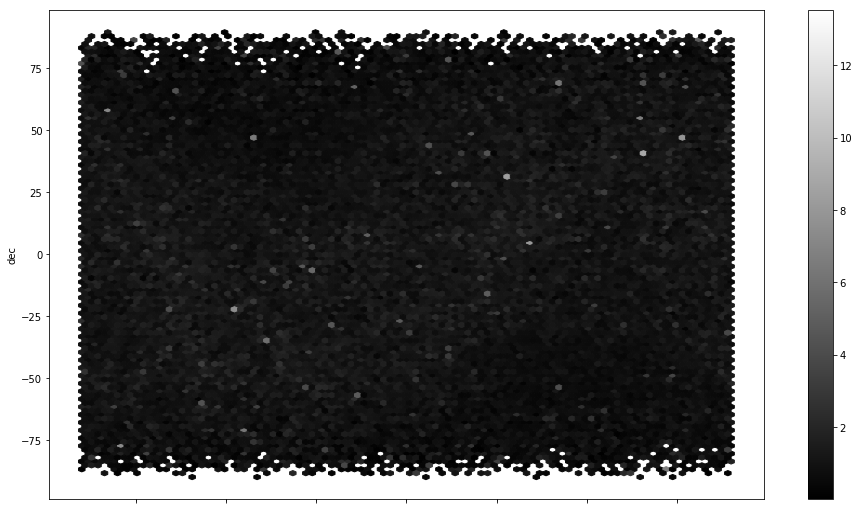

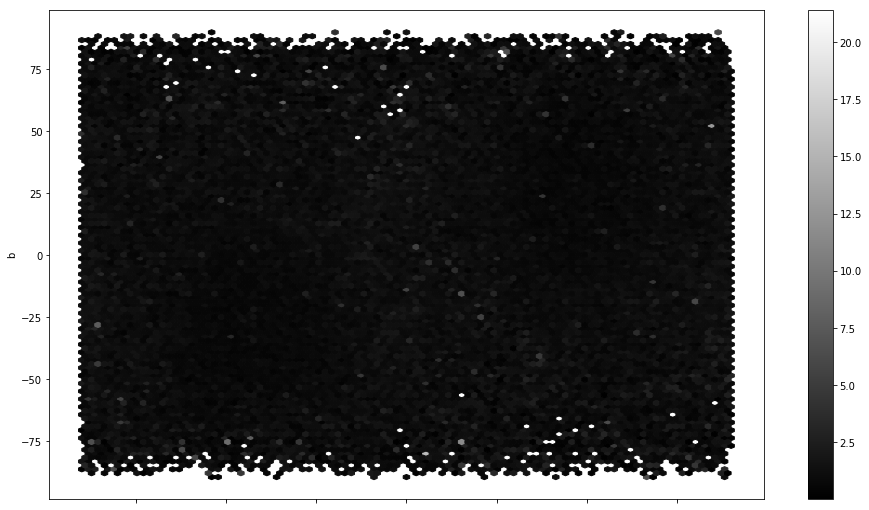

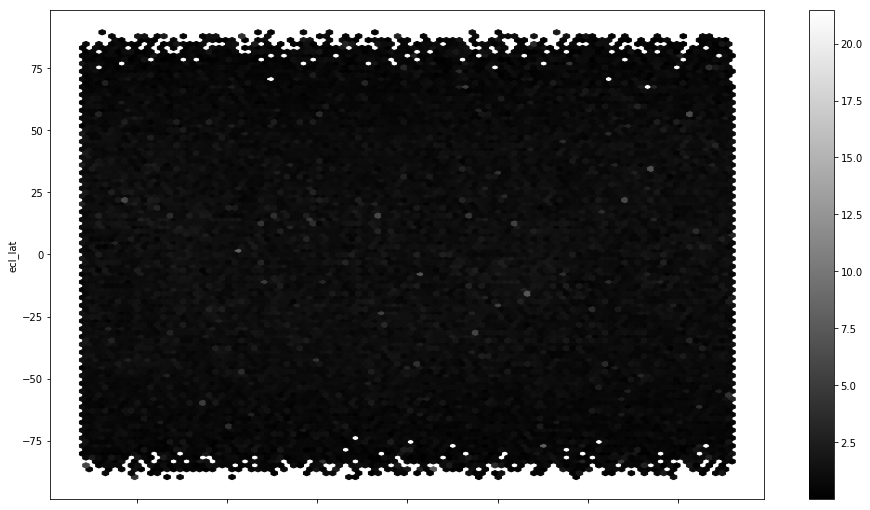

In [14]:
df_tgas_hip.plot.hexbin('ra','dec','parallax_difference',cmap='gray',figsize=(16, 9));
df_tgas_hip.plot.hexbin('l','b','parallax_difference',cmap='gray',figsize=(16, 9));
df_tgas_hip.plot.hexbin('ecl_lon', 'ecl_lat','parallax_difference',cmap='gray',figsize=(16, 9));

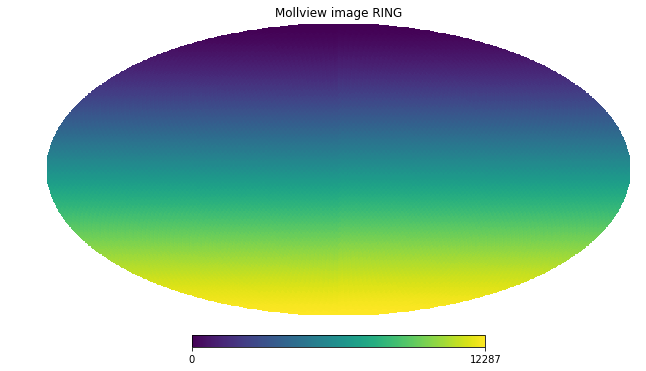

In [13]:
import numpy as np
import healpy as hp
NSIDE = 32
m = np.arange(hp.nside2npix(NSIDE))
hp.mollview(m, title="Mollview image RING")